# Laboratório 2

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo da segunda semana da disciplina.

A ideia principal é que vamos trabalhar um pouco mais com os quatro classificadores que já estudamos até agora: KNN, *Naive Bayes*, Árvore de Decisão e Regressão Logística.

Assim como no Laboratório 01, vamos utilizar o conjunto de dados ``College``, disponível [aqui](https://www.statlearning.com/resources-python).

Só para lembrar, o conjunto de dados contém informações sobre várias faculdades e universidades dos Estados Unidos. O significado de cada informação não é essencial para este exercício. Mas alguns exemplos de informações contidas no conjunto de dados são:

- `Private`: Indica se a instituição é pública ou privada
- `Apps`: Número de aplicações recebidas
- `Accept`: Número de aplicações aceitas
- `Enroll`: Número de novos alunos matriculados
- `Top10perc`: Percentual de novos alunos do top 10% de turmas do ensino médio
- `Top25perc`: Percentual de novos alunos do top 25% de turmas do ensino médio
- ...

## Obtenção dos dados

Para obter o conjunto de dados, execute o comando abaixo. O arquivo ``College.csv`` será diretamente acessível por meio desse *notebook*.

**Observação:** caso a sessão do *notebook* seja interrompida, será necessário baixar o conjunto de dados novamente.

In [ ]:
!wget https://www.statlearning.com/s/College.csv

--2025-01-28 22:45:30--  https://www.statlearning.com/s/College.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe064464c2528214f6bde/1610604644365/College.csv [following]
--2025-01-28 22:45:31--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe064464c2528214f6bde/1610604644365/College.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74924 (73K) [text/csv]
Saving to: ‘College.csv.14’

College.csv.14      100%[===================>]  73.17K  --.-KB/s    in 0.003s  

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Leitura e Preparação dos Dados [Não vale pontos, mas é necessário]

Repita a Parte I do Laboratório 01. Ou seja, prepare o conjunto de dados seguindo as instruções dos Itens 1.1 a 1.7 daquele Laboratório.

In [4]:
# Escreva sua resposta aqui
import pandas as pd
dataFrame = pd.read_csv("College.csv")
dataFrame.rename(columns={dataFrame.columns[0]: "College"}, inplace=True)
dataFrame = dataFrame.set_index("College")
dataFrame["Good School"] = (dataFrame["Top10perc"] > 25).astype(int)
y = dataFrame["Good School"].copy()
dataFrame.drop(columns=["Top10perc", "Top25perc", "Good School"], inplace=True)
dataFrame["Private"] = (dataFrame["Private"] == "Yes").astype(int)
dataFrame.head()

,Private,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Ao final da preparação, o *Data Frame* deve se parecer com o mostrado abaixo.

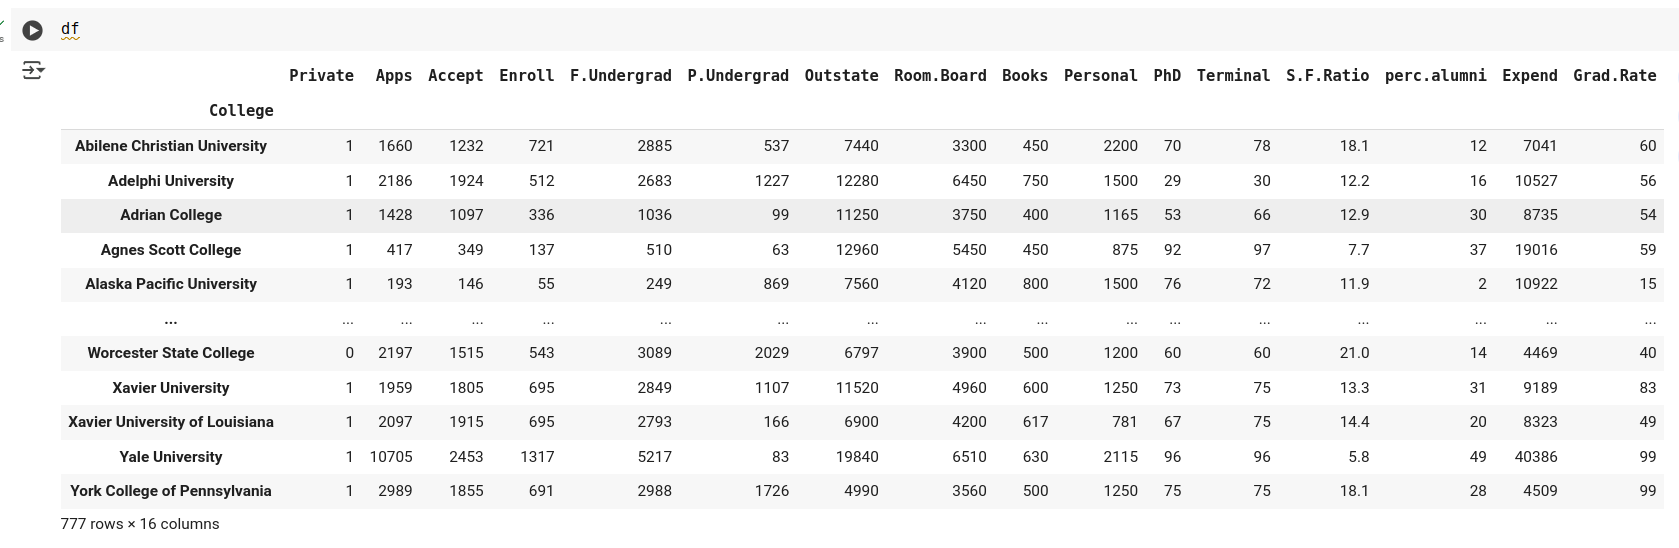

## Parte 1: Comparando os Classificadores [40 pontos - Todos os itens têm o mesmo valor]

Assim como no Laboratório 01, a tarefa de predição aqui será prever a variável `y` em função dos dados contidos no *Data Frame* resultante na parte anterior do laboratório.

Ou seja, o objetivo é criar um modelo para classificar se uma instituição de ensino é uma `Good School` ou não.

### Divisão em conjuntos de treinamento e teste.

Divida o conjunto de dados em porções distintas para treinamento e avaliação do classificador.

25% do conjunto de dados deve ser retido para testes.

Essa mesma divisão deverá ser utilizada no restante do laboratório.

O Código fornecido abaixo realiza essa separação para você e não deve ser alterado.

In [5]:
# não modifique esse código.

from sklearn.model_selection import train_test_split

X = dataFrame.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Item 1.1

Use os Classificadores [KNN](https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) e [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) no conjunto de dados acima. Ou seja:
1. Treine os quatro classificadores em `X_train` e `y_train`. Nesse momento, você **não** deve aplicar nenhuma transformação nos dados (e.g. padronização ou reescala). Além disso, não forneça nenhum parâmetro aos classificadores (todos os hiperparâmetros devem ser os padrões da `scikit-learn`);
2. Use cada um dos classificadores para prever os rótulos dos elementos do conjunto de teste, `X_test`.
3. Calcule e imprima a acurácia dos quatro classificadores no conjunto de teste.

In [46]:
# Escreva sua resposta aqui

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Acurácia do KNN %4f" %(acc_knn))

#Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive = naive_bayes.predict(X_test)
acc_naive = accuracy_score(y_test, y_pred_naive)
print("Acurácia do Naive Bayes %4f" %(acc_naive))

#Regressão Logística
#Acontece erro de iteracoes, mas funciona
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred_reg = reg_log.predict(X_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Acurácia da Regressão Log. %4f" %(acc_reg))

#Árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Acurácia da Árvore de Dec. %4f" %(acc_tree))

Acurácia do KNN 0.748718
Acurácia do Naive Bayes 0.758974
Acurácia da Regressão Log. 0.728205
Acurácia da Árvore de Dec. 0.743590


/home/kelvin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Item 1.2

Repita a mesma tarefa do Item 1.1.

No entanto, dessa vez, você deve aplicar a transformação por reescala nos dados. Lembre, o `scaler` deve ser ajustado ao conjunto de treinamento e posteriormente aplicado ao conjunto de teste.

Após isso, proceda como no Item 1.1 (treine e teste os classificadores e imprima a acurácia no conjunto de teste).

**Atenção:**
- O conjunto de treinamento transformado deve ser armazenado na variável `X_train_scaled`.
- Similarmente, o conjunto de teste transformado, deve ser armazenado na variável `X_test_scaled`.

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Acurácia do KNN %.4f" %(acc_knn))

#Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
y_pred_naive = naive_bayes.predict(X_test_scaled)
acc_naive = accuracy_score(y_test, y_pred_naive)
print("Acurácia do Naive Bayes %.4f" %(acc_naive))

#Regressão Logística
#Acontece erro de iteracoes, mas funciona
reg_log = LogisticRegression()
reg_log.fit(X_train_scaled, y_train)
y_pred_reg = reg_log.predict(X_test_scaled)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Acurácia da Regressão Log. %.4f" %(acc_reg))

#Árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Acurácia da Árvore de Dec. %.4f" %(acc_tree))

Acurácia do KNN 0.7436
Acurácia do Naive Bayes 0.7744
Acurácia da Regressão Log. 0.8000
Acurácia da Árvore de Dec. 0.7333


### Item 1.3

Com base nos resultados dos Itens 1.1 e 1.2, há alguma evidência inicial de que a transformação por reescala faz diferença?

Se sua resposta for sim, quais classificadores tiveram resultados próximos nos dois experimentos e quais tiveram resultados muito diferentes?

**Resposta:**
Sim, a transformação impacta nos resultados.
Um exemplo foi o algoritmo de Regressão Logística que sem a transformação tinha uma acurácia de 72% enquanto com os dados transformados atingiu 80%!

O KNN não alterou nem 1% os resultados, o Naive Bayes e a Árvore alterou-se um pouco mais de 1%

## Parte 2 - Impacto dos Hiperparâmetros [50 pontos - Todos os itens têm o mesmo valor]

Na segunda parte do Laboratório, vamos estudar um pouco sobre o impacto de alguns hiperparâmetros dos algoritmos vistos.

### Item 2.1 - KNN

Varie o $k$ do KNN de 1 a 30 (ou seja $k \in \{1, 2, 3, \dots, 30\}$).

Para cada $k$, treine um KNN, em `X_train_scaled`. Use o classificador treinado para obter os rótulos dos elementos em `X_test_scaled` e `y_train`. Calcule a acurácia do classificador no conjunto de teste.

Faça um gráfico $k \times \text{acurácia}$. Ou seja, no eixo $X$ deve-se ter o $k$ do KNN e no eixo $Y$ deve-se ter a acurácia do KNN quando $k$ é utilizado como hiperparâmetro.

**Observação:** Não é necessário fazer uma nova divisão de conjuntos de treinamento e teste. Também não é necessário ajustar um novo `scaler`. Os conjuntos de treinamento e teste (`X_train_scaled` e `X_teste_scaled`) devem ser reutilizados da Parte 1.

[0.7230769230769231, 0.7333333333333333, 0.7333333333333333, 0.7487179487179487, 0.7435897435897436, 0.7743589743589744, 0.7487179487179487, 0.7589743589743589, 0.764102564102564, 0.7692307692307693, 0.7743589743589744, 0.7794871794871795, 0.7743589743589744, 0.7846153846153846, 0.7794871794871795, 0.7846153846153846, 0.7897435897435897, 0.7846153846153846, 0.7794871794871795, 0.7897435897435897, 0.7846153846153846, 0.7743589743589744, 0.7794871794871795, 0.7846153846153846, 0.7743589743589744, 0.7692307692307693, 0.7692307692307693, 0.764102564102564, 0.764102564102564, 0.7589743589743589]


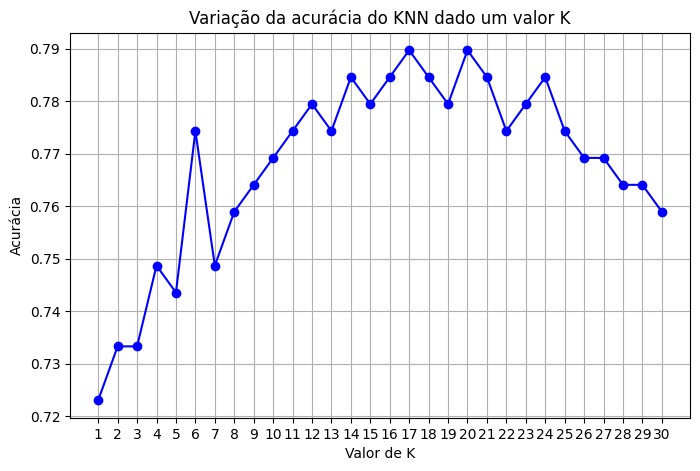

In [ ]:
# Escreva sua resposta aqui
import matplotlib.pyplot as plt
list_acc = []
for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  # list_acc += [accuracy_score(y_test, y_pred)]
  list_acc.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1, 31), list_acc, marker='o', linestyle='-', color='b')
plt.xticks(list(range(1, 31)))
plt.grid(True)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")
plt.title("Variação da acurácia do KNN dado um valor K")
plt.show()

### Item 2.2 - KNN

Com base na Figura gerada no Item 2.1, há algum valor (ou valores) de $k$ que leva o classificador a ter um desempenho melhor?



**Resposta:**
Sim, os valores para k = 17 e k = 20 deixam o algorítmo com uma precisão de 79%

### Item 2.3 - Regressão Logística

Varie o $C$ da Regressão Logística. Comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 50 valores espaçados exponencialmente de 0.01 a 1000. O código para gerar esses valores já está na resposta.

Para cada $C$ treine uma Regressão Logística, em `X_train_scaled` e `y_train`. Use o classificador treinado para obter os rótulos dos elementos em `X_test_scaled`. Calcule a acurácia do classificador no conjunto de teste.

Faça um gráfico $C \times \text{acurácia}$. Ou seja, no eixo $X$ deve-se ter o $C$ da Regressão Logística e no eixo $Y$ deve-se ter a acurácia do Regressão Logística quando $C$ é utilizado como hiperparâmetro.

**Dica:** Para uma melhor visualização, coloque o eixo $X$ da figura em escala logarítmica.
Para isso, veja a função [xscale](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html). Veja um exemplo [aqui](https://www.geeksforgeeks.org/matplotlib-pyplot-xscale-function-in-python/).

**Observação:** Não é necessário fazer uma nova divisão de conjuntos de treinamento e teste. Também não é necessário ajustar um novo `scaler`. Os conjuntos de treinamento e teste (`X_train_scaled` e `X_teste_scaled`) devem ser reutilizados da Parte 1.

[1.00000000e-02 1.26485522e-02 1.59985872e-02 2.02358965e-02
 2.55954792e-02 3.23745754e-02 4.09491506e-02 5.17947468e-02
 6.55128557e-02 8.28642773e-02 1.04811313e-01 1.32571137e-01
 1.67683294e-01 2.12095089e-01 2.68269580e-01 3.39322177e-01
 4.29193426e-01 5.42867544e-01 6.86648845e-01 8.68511374e-01
 1.09854114e+00 1.38949549e+00 1.75751062e+00 2.22299648e+00
 2.81176870e+00 3.55648031e+00 4.49843267e+00 5.68986603e+00
 7.19685673e+00 9.10298178e+00 1.15139540e+01 1.45634848e+01
 1.84206997e+01 2.32995181e+01 2.94705170e+01 3.72759372e+01
 4.71486636e+01 5.96362332e+01 7.54312006e+01 9.54095476e+01
 1.20679264e+02 1.52641797e+02 1.93069773e+02 2.44205309e+02
 3.08884360e+02 3.90693994e+02 4.94171336e+02 6.25055193e+02
 7.90604321e+02 1.00000000e+03]


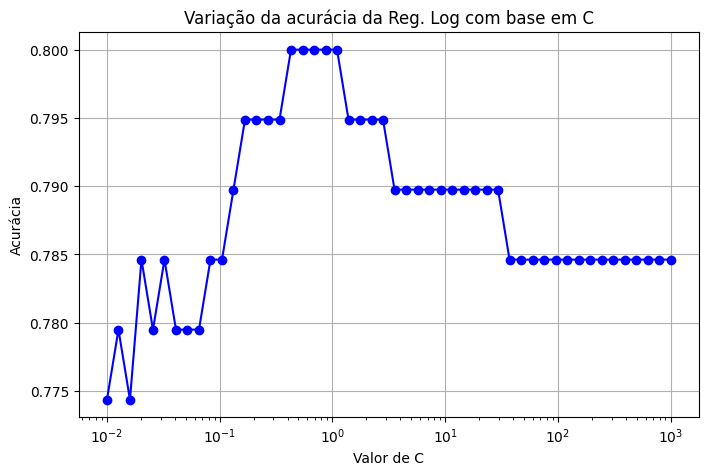

In [99]:
import numpy as np

c_range = np.logspace(-2, 3, num = 50)

print(c_range)
list_acc = []
# Escreva sua resposta aqui
for i in range(0, 50):
  reg_log = LogisticRegression(C=c_range[i])
  reg_log.fit(X_train_scaled, y_train)
  y_pred = reg_log.predict(X_test_scaled)
  list_acc.append(accuracy_score(y_test, y_pred))


plt.figure(figsize=(8,5))
plt.plot(c_range, list_acc, marker='o', linestyle='-', color='b')
plt.xticks(list(range(1, 51)))
plt.xscale('log')
plt.grid(True)
plt.xlabel("Valor de C")
plt.ylabel("Acurácia")
plt.title("Variação da acurácia da Reg. Log com base em C")
plt.show()

### Item 2.4 - Regressão Logística

Com base na Figura gerada no Item 2.3, há algum valor (ou valores) de $C$ que leva o classificador a ter um desempenho melhor?

**Resposta:**
Sim, os valores próximo de 10^0 são os mais indicados para se obter uma acurácia alta!

### Item 2.5 - Árvore de Decisão

Varie o a profundidade máxima da Árvore de decisão de 1 a 30.

Para cada profundidade máxima (parâmetro `max_depth`), treine uma Árvore de Decisão, em `X_train_scaled`. Use o classificador treinado para obter os rótulos dos elementos em `X_test_scaled` e `y_train`. Calcule a acurácia do classificador no conjunto de teste.

Faça um gráfico Profundidade Máxima $\times~\text{acurácia}$. Ou seja, no eixo $X$ deve-se ter a Profundidade Máxima da Árvore de Decisão e no eixo $Y$ deve-se ter a acurácia do KNN quando tal profundidade é utilizada como hiperparâmetro.

**Observação:** Não é necessário fazer uma nova divisão de conjuntos de treinamento e teste. Também não é necessário ajustar um novo `scaler`. Os conjuntos de treinamento e teste (`X_train_scaled` e `X_teste_scaled`) devem ser reutilizados da Parte 1.

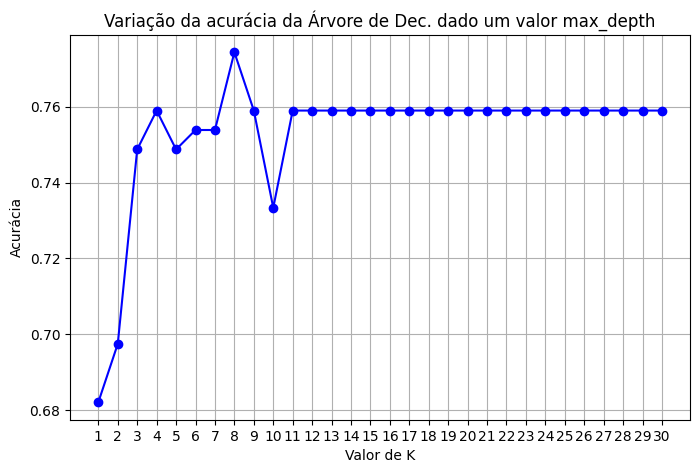

0.7743589743589744


In [89]:
# Escreva sua resposta aqui
list_acc = []
for i in range(1,31):
  tree = DecisionTreeClassifier(max_depth=i, random_state=42)
  tree.fit(X_train_scaled, y_train)
  y_pred = tree.predict(X_test_scaled)
  # list_acc += [accuracy_score(y_test, y_pred)]
  list_acc.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1, 31), list_acc, marker='o', linestyle='-', color='b')
plt.xticks(list(range(1, 31)))
plt.grid(True)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")
plt.title("Variação da acurácia da Árvore de Dec. dado um valor max_depth")
plt.show()
print(max(list_acc))


### Item 2.6 - Árvore de Decisão

Com base na Figura gerada no Item 2.5, há algum valor (ou valores) para a profundidade máxima da árvore de decisão que leva o classificador a ter um desempenho melhor?

**Resposta:**
Sim, com a profundidade setada em 8, a acurácia da árvore sobe para 77,4%

### Item 2.7 - Gaussian Naive Bayes

Varie o parâmetro `var_smoothin` do classificador *Gaussian Naive Bayes*. Comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 100 valores espaçados exponencialmente de $10^{-11}$ a $10^{11}$. O código para gerar esses valores já está na resposta.

Para cada valor de `var_smoothin` treine um *Gaussian Naive Bayes*, em `X_train_scaled` e `y_train`. Use o classificador treinado para obter os rótulos dos elementos em `X_test_scaled`. Calcule a acurácia do classificador no conjunto de teste.

Faça um gráfico `var_smoothin` $\times~\text{acurácia}$. Ou seja, no eixo $X$ deve-se ter o `var_smoothin` do *Gaussian Naive Bayes* e no eixo $Y$ deve-se ter a acurácia do *Gaussian Naive Bayes* quando `var_smoothin` é utilizado como hiperparâmetro.

**Dica:** Para uma melhor visualização, coloque o eixo $X$ da figura em escala logarítmica.
Para isso, veja a função [xscale](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html). Veja um exemplo [aqui](https://www.geeksforgeeks.org/matplotlib-pyplot-xscale-function-in-python/).

**Observação:** Não é necessário fazer uma nova divisão de conjuntos de treinamento e teste. Também não é necessário ajustar um novo `scaler`. Os conjuntos de treinamento e teste (`X_train_scaled` e `X_teste_scaled`) devem ser reutilizados da Parte 1.

0.059948425031893966


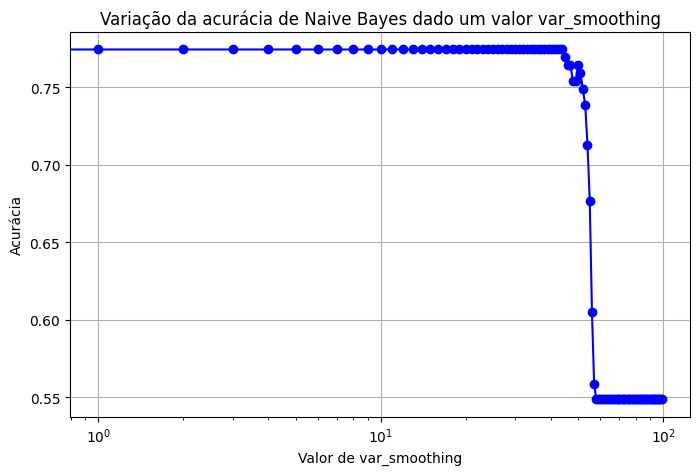

0.7743589743589744


In [109]:
vsmt_range = np.logspace(-11, 11, num = 100)

# Escreva sua resposta aqui
list_acc = []
vmst = 0
for i in range(0,100):
  naive_bayes = GaussianNB(var_smoothing=vsmt_range[i])
  naive_bayes.fit(X_train_scaled, y_train)
  y_pred = naive_bayes.predict(X_test_scaled)
  # list_acc += [accuracy_score(y_test, y_pred)]
  list_acc.append(accuracy_score(y_test, y_pred))
  if  accuracy_score(y_test, y_pred) == 0.7743589743589744:
    vsmt = vsmt_range[i]

print(vsmt)
# print(list_acc)
plt.figure(figsize=(8,5))
plt.plot(range(0, 100), list_acc, marker='o', linestyle='-', color='b')
# plt.xticks(list(range(0, 100)))
plt.grid(True)
plt.xlabel("Valor de var_smoothing")
plt.ylabel("Acurácia")
plt.title("Variação da acurácia de Naive Bayes dado um valor var_smoothing")
plt.xscale('log')
plt.show()
print(max(list_acc))



### Item 2.8 - Gaussian Naive Bayes

Com base na Figura gerada no Item 2.7, há algum valor (ou valores) para o parâmetro `var_smothing` do *Gaussian Naive Bayes* que leva o classificador a ter um desempenho melhor?

**Resposta:**
Sim, os valores de 10^0 até 10^1,4, atingem uma acurácia de 77%, a partir dai a acurácia cai drasticamente. 

## Parte 3 [10 pontos - Todos os itens têm o mesmo valor]

### Item 3.1

Com base nos resultados da Parte 2, repita o experimento do Item 1.2. No entanto, agora, ao invés de utilizar os hiperparâmetros fornecidos pela `scikit-learn`, use os valores que você identificou como apropriados para os classificadores. Ou seja:
- Para o KNN, use o $k$ identificado no Item 2.2;
- Para a Regressão Logística, use o $C$ identificado no Item 2.4;
- Para a Árvore de Decisão, use a Profundidade Máxima identificada no Item 2.6;
- Para o *Gaussian Naive Bayes*, use o `var_smoothing` identificado no Item 2.8.

**Observação:** esse exercício é apenas para fins de prática. Essa não é uma metodologia adequada para escolha de hiperparâmetros. Isso será abordado mais adiante no curso.

In [117]:
# Escreva sua resposta aqui
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#KNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Acurácia do KNN %.4f" %(acc_knn))

#Naive Bayes
naive_bayes = GaussianNB(var_smoothing=0)
naive_bayes.fit(X_train_scaled, y_train)
y_pred_naive = naive_bayes.predict(X_test_scaled)
acc_naive = accuracy_score(y_test, y_pred_naive)
print("Acurácia do Naive Bayes %.4f" %(acc_naive))

#Regressão Logística
#Acontece erro de iteracoes, mas funciona
reg_log = LogisticRegression(C=1)
reg_log.fit(X_train_scaled, y_train)
y_pred_reg = reg_log.predict(X_test_scaled)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Acurácia da Regressão Log. %.4f" %(acc_reg))

#Árvore de decisão
tree = DecisionTreeClassifier(max_depth=8, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Acurácia da Árvore de Dec. %.4f" %(acc_tree))

Acurácia do KNN 0.7897
Acurácia do Naive Bayes 0.7744
Acurácia da Regressão Log. 0.8000
Acurácia da Árvore de Dec. 0.7744


### Item 3.2

Comente os resultados. Os hiperparâmetros fornecidos fizeram diferença significativa para algum classificador (Comparando os resultados do Item 1.2 com os do Item 3.1)?

Em outras palavras, é razoável dizer que os hiperparâmtros fornecidos pela `scikit-learn` são adequados ao conjunto de dados?



**Resposta:**
Os únicos que se alteraram foram o KNN, saindo de 74% para 78% e a Árvore de Decisão, saindo de 73% para uma acurácia de 77%.

Dado essa pouca divergência, é possível afirmar que sim, os hiperparâmetros fornecidos pelo scikit-learn são adequados ao conjunto de dados.